<a href="https://colab.research.google.com/github/takayama-rado/trado_samples/blob/main/colab_files/gislr_transformer_encoder_daug_tinterp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Download dataset and modules

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Copy to local.
!cp drive/MyDrive/Datasets/gislr_dataset_top10.zip gislr_top10.zip

In [ ]:
!unzip -o gislr_top10.zip

Archive:  gislr_top10.zip
   creating: dataset_top10/
  inflating: dataset_top10/16069.hdf5  
  inflating: dataset_top10/18796.hdf5  
  inflating: dataset_top10/2044.hdf5  
  inflating: dataset_top10/22343.hdf5  
  inflating: dataset_top10/25571.hdf5  
  inflating: dataset_top10/26734.hdf5  
  inflating: dataset_top10/27610.hdf5  
  inflating: dataset_top10/28656.hdf5  
  inflating: dataset_top10/29302.hdf5  
  inflating: dataset_top10/30680.hdf5  
  inflating: dataset_top10/32319.hdf5  
  inflating: dataset_top10/34503.hdf5  
  inflating: dataset_top10/36257.hdf5  
  inflating: dataset_top10/37055.hdf5  
  inflating: dataset_top10/37779.hdf5  
  inflating: dataset_top10/4718.hdf5  
  inflating: dataset_top10/49445.hdf5  
  inflating: dataset_top10/53618.hdf5  
  inflating: dataset_top10/55372.hdf5  
  inflating: dataset_top10/61333.hdf5  
  inflating: dataset_top10/62590.hdf5  
  inflating: dataset_top10/LICENSE.txt  
  inflating: dataset_top10/sign_to_prediction_index_map.json  


In [ ]:
!ls dataset_top10

16069.hdf5  25571.hdf5	29302.hdf5  36257.hdf5	49445.hdf5  62590.hdf5
18796.hdf5  26734.hdf5	30680.hdf5  37055.hdf5	53618.hdf5  LICENSE.txt
2044.hdf5   27610.hdf5	32319.hdf5  37779.hdf5	55372.hdf5  sign_to_prediction_index_map.json
22343.hdf5  28656.hdf5	34503.hdf5  4718.hdf5	61333.hdf5


In [ ]:
!cat dataset_top10/sign_to_prediction_index_map.json

{
    "listen": 0,
    "look": 1,
    "shhh": 2,
    "donkey": 3,
    "mouse": 4,
    "duck": 5,
    "uncle": 6,
    "hear": 7,
    "pretend": 8,
    "cow": 9
}

In [ ]:
!cat dataset_top10/LICENSE.txt

The dataset provided by Natsuki Takayama (Takayama Research and Development Office) is licensed under CC-BY 4.0.
Author: Copyright 2024 Natsuki Takayama
Title: GISLR Top 10 dataset
Original licenser: Deaf Professional Arts Network and the Georgia Institute of Technology
Modification
- Extract 10 most frequent words.
- Packaged into HDF5 format.


In [ ]:
import h5py
with h5py.File("dataset_top10/16069.hdf5", "r") as fread:
    keys = list(fread.keys())
    print(keys)
    group = fread[keys[0]]
    print(group.keys())
    feature = group["feature"][:]
    token = group["token"][:]
    print(feature.shape)
    print(token)

['1109479272', '11121526', '1120349077', '1125456612', '1159046211', '1169128497', '1186032553', '1223803476', '1259708636', '1281972067', '129232566', '1334702305', '1340979012', '1352964057', '1370052047', '1383455381', '1431148933', '1435203624', '1437919781', '1458770030', '1462881097', '1469867050', '1474050058', '147607644', '1513539919', '1520635928', '1524297234', '153676122', '1537751003', '1542212461', '1551759770', '158232956', '1585855916', '1632709119', '1638742455', '1696757219', '177479476', '1779635114', '1791684792', '1801566440', '1831167282', '1867385690', '1880570146', '1901587887', '1910121429', '1919659282', '192873038', '1935012113', '1949620203', '195098847', '1983552660', '1989475963', '1998715062', '2007709802', '2036010239', '2036360025', '2046296211', '2082116372', '2098813002', '2109640010', '2121879330', '2141852087', '2148832702', '2152013823', '2166805079', '2176613834', '2184232774', '2213965523', '2249630763', '2256677805', '2263287955', '2263683020', 

In [ ]:
!wget https://github.com/takayama-rado/trado_samples/archive/refs/tags/v0.1.zip -O master.zip

--2024-07-19 01:44:38--  https://github.com/takayama-rado/trado_samples/archive/master.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/takayama-rado/trado_samples/zip/main [following]
--2024-07-19 01:44:38--  https://codeload.github.com/takayama-rado/trado_samples/zip/main
Resolving codeload.github.com (codeload.github.com)... 140.82.116.9
Connecting to codeload.github.com (codeload.github.com)|140.82.116.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [           <=>      ]  75.66M  18.8MB/s    in 4.0s    

2024-07-19 01:44:42 (18.8 MB/s) - ‘master.zip’ saved [79338780]



In [ ]:
!unzip -o master.zip -d master

Archive:  master.zip
21bfd6e70ae9b33080ab14cafe327d1c9346b107
   creating: master/trado_samples-main/
  inflating: master/trado_samples-main/.gitignore  
  inflating: master/trado_samples-main/LICENSE  
  inflating: master/trado_samples-main/README.md  
   creating: master/trado_samples-main/colab_files/
 extracting: master/trado_samples-main/colab_files/.gitkeep  
  inflating: master/trado_samples-main/colab_files/exp_affine_np_einsum.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_jax_static.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpholistic_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_mpothers_0.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_jax.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_numpy.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_tensorflow.ipynb  
  inflating: master/trado_samples-main/colab_files/exp_track_affine_torch.ipynb

In [ ]:
!mv master/trado_samples-main/src/modules_gislr .

In [ ]:
!rm -rf master master.zip gislr_top10.zip

In [ ]:
!ls

dataset_top10  drive  modules_gislr  sample_data


# 2. Load library

In [ ]:
!pip3 install torchinfo

In [ ]:
import json
import os
import random
import sys
from functools import partial
from pathlib import Path
from typing import (
    Dict
)

# Third party's modules
import numpy as np

import torch
from torch.utils.data import (
    DataLoader)

from torchvision.transforms import Compose

# Local modules
sys.path.append("modules_gislr")
from modules_gislr.dataset import (
    HDF5Dataset,
    merge_padded_batch)
from modules_gislr.defines import (
    get_fullbody_landmarks
)
from modules_gislr.layers import (
    TransformerEnISLR
)
from modules_gislr.train_functions import (
    test_loop,
    val_loop,
    train_loop
)
from modules_gislr.transforms import (
    PartsBasedNormalization,
    ReplaceNan,
    SelectLandmarksAndFeature,
    ToTensor,
    matrix_interp
)

# 3. Implement temporal interpolation.

In [ ]:
class PartsBasedTemporalInterpolation():
    """Apply parts-based temporal interpolation.
    """

    def __init__(self,
                 apply_ratio=1.0,
                 face_head=0,
                 face_num=76,
                 lhand_head=76,
                 lhand_num=21,
                 pose_head=76+21,
                 pose_num=12,
                 rhand_head=76+21+12,
                 rhand_num=21,
                 accept_correct_ratio=0.1) -> None:
        self.apply_ratio = apply_ratio
        self.face_head = face_head
        self.face_num = face_num
        self.lhand_head = lhand_head
        self.lhand_num = lhand_num
        self.pose_head = pose_head
        self.pose_num = pose_num
        self.rhand_head = rhand_head
        self.rhand_num = rhand_num
        self.accept_correct_ratio = accept_correct_ratio

    def _gen_tmask(self, feature):
        tmask = feature == 0.0
        tmask = np.all(tmask, axis=(0, 2))
        tmask = np.logical_not(tmask)
        return tmask

    def _interp(self, feature):
        tmask = self._gen_tmask(feature)
        # `[C, T, J]`
        orig_shape = feature.shape
        tlength = orig_shape[1]
        # No failed tracking.
        if tmask.sum() == tlength:
            return feature
        # Too many failed.
        if tmask.sum() < self.accept_correct_ratio:
            return feature
        # All failed.
        if tmask.sum() == 0.0:
            return feature

        x = np.arange(tlength)
        xs = np.where(tmask != 0)[0]
        # `[C, T, J] -> [T, C*J]`
        feature = feature.transpose([1, 0, 2]).reshape([tlength, -1])
        ys = feature[xs, :]

        newfeature = matrix_interp(x, xs, ys)
        # `[T, C*J] -> [T, C, J] -> [C, T, J]`
        newfeature = newfeature.reshape([-1, orig_shape[0], orig_shape[2]])
        newfeature = newfeature.transpose([1, 0, 2])
        assert np.isnan(newfeature).any() == np.False_
        assert np.isinf(newfeature).any() == np.False_
        return newfeature

    def __call__(self,
                 data: Dict[str, Any]) -> Dict[str, Any]:
        """Execute interpolation.
        """
        if random.random() > self.apply_ratio:
            return data

        feature = data["feature"]
        if self.face_num > 0:
            face = feature[:, :, self.face_head: self.face_head+self.face_num]
            face = self._interp(face)
            feature[:, :, self.face_head: self.face_head+self.face_num] = face
        if self.lhand_num > 0:
            lhand = feature[:, :, self.lhand_head: self.lhand_head+self.lhand_num]
            lhand = self._interp(lhand)
            feature[:, :, self.lhand_head: self.lhand_head+self.lhand_num] = lhand
        if self.pose_num > 0:
            pose = feature[:, :, self.pose_head: self.pose_head+self.pose_num]
            pose = self._interp(pose)
            feature[:, :, self.pose_head: self.pose_head+self.pose_num] = pose
        if self.rhand_num > 0:
            rhand = feature[:, :, self.rhand_head: self.rhand_head+self.rhand_num]
            rhand = self._interp(rhand)
            feature[:, :, self.rhand_head: self.rhand_head+self.rhand_num] = rhand
        data["feature"] = feature
        return data

    def __str__(self):
        return f"{self.__class__.__name__}:{self.__dict__}"

# 4. Sanity check

In [ ]:
# Access check.
dataset_dir = Path("dataset_top10")
files = list(dataset_dir.iterdir())
dictionary = [fin for fin in files if ".json" in fin.name][0]
hdf5_files = [fin for fin in files if ".hdf5" in fin.name]

print(dictionary)
print(hdf5_files)

dataset_top10/sign_to_prediction_index_map.json
[PosixPath('dataset_top10/37779.hdf5'), PosixPath('dataset_top10/2044.hdf5'), PosixPath('dataset_top10/16069.hdf5'), PosixPath('dataset_top10/25571.hdf5'), PosixPath('dataset_top10/62590.hdf5'), PosixPath('dataset_top10/27610.hdf5'), PosixPath('dataset_top10/37055.hdf5'), PosixPath('dataset_top10/32319.hdf5'), PosixPath('dataset_top10/55372.hdf5'), PosixPath('dataset_top10/18796.hdf5'), PosixPath('dataset_top10/26734.hdf5'), PosixPath('dataset_top10/53618.hdf5'), PosixPath('dataset_top10/4718.hdf5'), PosixPath('dataset_top10/30680.hdf5'), PosixPath('dataset_top10/22343.hdf5'), PosixPath('dataset_top10/29302.hdf5'), PosixPath('dataset_top10/34503.hdf5'), PosixPath('dataset_top10/49445.hdf5'), PosixPath('dataset_top10/28656.hdf5'), PosixPath('dataset_top10/61333.hdf5'), PosixPath('dataset_top10/36257.hdf5')]


In [ ]:
# Load dictionary.
with open(dictionary, "r") as fread:
    key2token = json.load(fread)

VOCAB = len(key2token)

In [ ]:
_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]
trans_select_feature = SelectLandmarksAndFeature(landmarks=use_landmarks, features=use_features)
trans_repnan = ReplaceNan()
trans_norm = PartsBasedNormalization(align_mode="framewise", scale_mode="unique")

pre_transforms = Compose([trans_select_feature,
                          trans_repnan,
                          trans_norm])

transforms_tinterp_00 = Compose([
    PartsBasedTemporalInterpolation(apply_ratio=0.0),
    ToTensor()])

transforms_tinterp_05 = Compose([
    PartsBasedTemporalInterpolation(apply_ratio=0.5),
    ToTensor()])

transforms_tinterp_10 = Compose([
    PartsBasedTemporalInterpolation(apply_ratio=1.0),
    ToTensor()])

In [ ]:
batch_size = 2
feature_shape = (len(use_features), -1, len(use_landmarks))
token_shape = (1,)
merge_fn = partial(merge_padded_batch,
                   feature_shape=feature_shape,
                   token_shape=token_shape,
                   feature_padding_val=0.0,
                   token_padding_val=0)

for trans in [transforms_tinterp_00, transforms_tinterp_05, transforms_tinterp_10]:
    dataset = HDF5Dataset(hdf5_files, pre_transforms=pre_transforms, transforms=trans)
    dataloader = DataLoader(dataset, batch_size=batch_size, collate_fn=merge_fn)
    try:
        data = next(iter(dataloader))
        feature_origin = data["feature"]

        print(feature_origin.shape)
    except Exception as inst:
        print(inst)

torch.Size([2, 2, 9, 130])
torch.Size([2, 2, 9, 130])
torch.Size([2, 2, 9, 130])


In [ ]:
# Define model.
# in_channels: J * C (130*2=260)
#   J: use_landmarks (130)
#   C: use_channels (2)
# out_channels: 10
in_channels = len(use_landmarks) * len(use_features)
inter_channels = 64
out_channels = VOCAB
activation = "relu"
tren_num_layers = 2
tren_num_heads = 2
tren_dim_ffw = 256
tren_dropout_pe = 0.1
tren_dropout = 0.1
tren_layer_norm_eps = 1e-5
tren_norm_first = True
tren_add_bias = True
tren_add_tailnorm = True

pooling_type = "none"

model = TransformerEnISLR(in_channels=in_channels,
                          inter_channels=inter_channels,
                          out_channels=out_channels,
                          activation=activation,
                          pooling_type=pooling_type,
                          tren_num_layers=tren_num_layers,
                          tren_num_heads=tren_num_heads,
                          tren_dim_ffw=tren_dim_ffw,
                          tren_dropout_pe=tren_dropout_pe,
                          tren_dropout=tren_dropout,
                          tren_layer_norm_eps=tren_layer_norm_eps,
                          tren_norm_first=tren_norm_first,
                          tren_add_bias=tren_add_bias,
                          tren_add_tailnorm=tren_add_tailnorm)
print(model)

# Sanity check.
logit = model(feature_origin)
print(logit.shape)
attw0 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
attw1 = model.tr_encoder.layers[0].attw.detach().cpu().numpy()
print(attw0.shape, attw1.shape)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

# 5. Train and evaluation

## 5.1 Set common parameters.

In [ ]:
# Set common parameters.
batch_size = 32
load_into_ram = True
test_pid = 16069
num_workers = os.cpu_count()
print(f"Using {num_workers} cores for data loading.")
lr = 3e-4

epochs = 50
eval_every_n_epochs = 1
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} for computation.")

train_hdf5files = [fin for fin in hdf5_files if str(test_pid) not in fin.name]
val_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]
test_hdf5files = [fin for fin in hdf5_files if str(test_pid) in fin.name]

_, use_landmarks = get_fullbody_landmarks()
use_features = ["x", "y"]

Using 2 cores for data loading.
Using cuda for computation.


In [ ]:
# Build dataloaders.
train_dataset_tinterp_00 = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_tinterp_00,
    load_into_ram=load_into_ram)

train_dataset_tinterp_05 = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_tinterp_05,
    load_into_ram=load_into_ram)

train_dataset_tinterp_10 = HDF5Dataset(
    train_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_tinterp_10,
    load_into_ram=load_into_ram)

val_dataset_tinterp_00 = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_tinterp_00,
    load_into_ram=load_into_ram)
test_dataset_tinterp_00 = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_tinterp_00,
    load_into_ram=load_into_ram)

val_dataset_tinterp_10 = HDF5Dataset(
    val_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_tinterp_10,
    load_into_ram=load_into_ram)
test_dataset_tinterp_10 = HDF5Dataset(
    test_hdf5files,
    pre_transforms=pre_transforms,
    transforms=transforms_tinterp_10,
    load_into_ram=load_into_ram)

train_dataloader_tinterp_00 = DataLoader(train_dataset_tinterp_00, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
train_dataloader_tinterp_05 = DataLoader(train_dataset_tinterp_05, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)
train_dataloader_tinterp_10 = DataLoader(train_dataset_tinterp_10, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=True)

val_dataloader_tinterp_00 = DataLoader(val_dataset_tinterp_00, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader_tinterp_00 = DataLoader(test_dataset_tinterp_00, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

val_dataloader_tinterp_10 = DataLoader(val_dataset_tinterp_10, batch_size=batch_size, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)
test_dataloader_tinterp_10 = DataLoader(test_dataset_tinterp_10, batch_size=1, collate_fn=merge_fn, num_workers=num_workers, shuffle=False)

## 5.2 Run training process

### Without temporal interpolation.

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "none"

model_tinterp_00 = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_tinterp_00)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_tinterp_00.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

In [ ]:
# Train, validation, and evaluation.
model_tinterp_00.to(device)

train_losses = []
val_losses_tinterp_00 = []
test_accs_tinterp_00 = []
val_losses_tinterp_10 = []
test_accs_tinterp_10 = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader_tinterp_00, model_tinterp_00, loss_fn, optimizer, device)
    val_loss_tinterp_00 = val_loop(val_dataloader_tinterp_00, model_tinterp_00, loss_fn, device)
    val_losses_tinterp_00.append(val_loss_tinterp_00)
    val_loss_tinterp_10 = val_loop(val_dataloader_tinterp_10, model_tinterp_00, loss_fn, device)
    val_losses_tinterp_10.append(val_loss_tinterp_10)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc_tinterp_00 = test_loop(test_dataloader_tinterp_00, model_tinterp_00, device)
        test_accs_tinterp_00.append(acc_tinterp_00)
        acc_tinterp_10 = test_loop(test_dataloader_tinterp_10, model_tinterp_00, device)
        test_accs_tinterp_10.append(acc_tinterp_10)
train_losses_tinterp_00 = np.array(train_losses)
val_losses_tinterp_00_vs_tinterp_00 = np.array(val_losses_tinterp_00)
test_accs_tinterp_00_vs_tinterp_00 = np.array(test_accs_tinterp_00)
val_losses_tinterp_00_vs_tinterp_10 = np.array(val_losses_tinterp_10)
test_accs_tinterp_00_vs_tinterp_10 = np.array(test_accs_tinterp_10)

print(f"Minimum validation loss (Train: W0-Tinterp, Test: WO-Tinterp):{val_losses_tinterp_00_vs_tinterp_00.min()} at {np.argmin(val_losses_tinterp_00_vs_tinterp_00)+1} epoch.")
print(f"Maximum accuracy (Train: W0-Tinterp, Test: WO-Tinterp):{test_accs_tinterp_00_vs_tinterp_00.max()} at {np.argmax(test_accs_tinterp_00_vs_tinterp_00)*eval_every_n_epochs+1} epoch.")

print(f"Minimum validation loss (Train: W0-Tinterp, Test: W-Tinterp):{val_losses_tinterp_00_vs_tinterp_10.min()} at {np.argmin(val_losses_tinterp_00_vs_tinterp_10)+1} epoch.")
print(f"Maximum accuracy (Train: W0-Tinterp, Test: W-Tinterp):{test_accs_tinterp_00_vs_tinterp_10.max()} at {np.argmax(test_accs_tinterp_00_vs_tinterp_10)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.820244 [    0/ 3881]
loss:1.714195 [ 3200/ 3881]
Done. Time:4.108065167999996
Training performance: 
 Avg loss:2.132699

Start validation.
Done. Time:0.24950152700000672
Validation performance: 
 Avg loss:2.096732

Start validation.
Done. Time:0.3037123720000068
Validation performance: 
 Avg loss:1.996433

Start evaluation.
Done. Time:1.2043801639999856
Test performance: 
 Accuracy:24.5%
Start evaluation.
Done. Time:1.1987244710000198
Test performance: 
 Accuracy:29.5%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.850728 [    0/ 3881]
loss:1.571152 [ 3200/ 3881]
Done. Time:4.58215561099999
Training performance: 
 Avg loss:1.508758

Start validation.
Done. Time:0.2535763900000063
Validation performance: 
 Avg loss:1.716931

Start validation.
Done. Time:0.3230073819999859
Validation performance: 


### With temporal interpolation (50%).

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "none"

model_tinterp_05 = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_tinterp_05)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_tinterp_05.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

In [ ]:
# Train, validation, and evaluation.
model_tinterp_05.to(device)

train_losses = []
val_losses_tinterp_00 = []
test_accs_tinterp_00 = []
val_losses_tinterp_10 = []
test_accs_tinterp_10 = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader_tinterp_05, model_tinterp_05, loss_fn, optimizer, device)
    val_loss_tinterp_00 = val_loop(val_dataloader_tinterp_00, model_tinterp_05, loss_fn, device)
    val_losses_tinterp_00.append(val_loss_tinterp_00)
    val_loss_tinterp_10 = val_loop(val_dataloader_tinterp_10, model_tinterp_05, loss_fn, device)
    val_losses_tinterp_10.append(val_loss_tinterp_10)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc_tinterp_00 = test_loop(test_dataloader_tinterp_00, model_tinterp_05, device)
        test_accs_tinterp_00.append(acc_tinterp_00)
        acc_tinterp_10 = test_loop(test_dataloader_tinterp_10, model_tinterp_05, device)
        test_accs_tinterp_10.append(acc_tinterp_10)
train_losses_tinterp_05 = np.array(train_losses)
val_losses_tinterp_05_vs_tinterp_00 = np.array(val_losses_tinterp_00)
test_accs_tinterp_05_vs_tinterp_00 = np.array(test_accs_tinterp_00)
val_losses_tinterp_05_vs_tinterp_10 = np.array(val_losses_tinterp_10)
test_accs_tinterp_05_vs_tinterp_10 = np.array(test_accs_tinterp_10)

print(f"Minimum validation loss (Train: W-Tinterp(50%), Test: WO-Tinterp):{val_losses_tinterp_05_vs_tinterp_00.min()} at {np.argmin(val_losses_tinterp_05_vs_tinterp_00)+1} epoch.")
print(f"Maximum accuracy (Train: W-Tinterp(50%), Test: WO-Tinterp):{test_accs_tinterp_05_vs_tinterp_00.max()} at {np.argmax(test_accs_tinterp_05_vs_tinterp_00)*eval_every_n_epochs+1} epoch.")

print(f"Minimum validation loss (Train: W-Tinterp(50%), Test: W-Tinterp):{val_losses_tinterp_05_vs_tinterp_10.min()} at {np.argmin(val_losses_tinterp_05_vs_tinterp_10)+1} epoch.")
print(f"Maximum accuracy (Train: W-Tinterp(50%), Test: W-Tinterp):{test_accs_tinterp_05_vs_tinterp_10.max()} at {np.argmax(test_accs_tinterp_05_vs_tinterp_10)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:4.113954 [    0/ 3881]
loss:2.091549 [ 3200/ 3881]
Done. Time:3.2093166579999206
Training performance: 
 Avg loss:2.224524

Start validation.
Done. Time:0.2617036909999797
Validation performance: 
 Avg loss:1.996516

Start validation.
Done. Time:0.311286821000067
Validation performance: 
 Avg loss:1.932740

Start evaluation.
Done. Time:1.1587071080000442
Test performance: 
 Accuracy:30.0%
Start evaluation.
Done. Time:1.2232002399999828
Test performance: 
 Accuracy:32.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.888194 [    0/ 3881]
loss:1.120901 [ 3200/ 3881]
Done. Time:3.297571199999993
Training performance: 
 Avg loss:1.508362

Start validation.
Done. Time:0.41416498799992496
Validation performance: 
 Avg loss:1.825295

Start validation.
Done. Time:0.4792359939999642
Validation performance: 

### With temporal interpolation (100%).

In [ ]:
tren_norm_first = True
tren_add_tailnorm = True
pooling_type = "none"

model_tinterp_10 = TransformerEnISLR(
    in_channels=in_channels,
    inter_channels=inter_channels,
    out_channels=out_channels,
    activation=activation,
    pooling_type=pooling_type,
    tren_num_layers=tren_num_layers,
    tren_num_heads=tren_num_heads,
    tren_dim_ffw=tren_dim_ffw,
    tren_dropout_pe=tren_dropout_pe,
    tren_dropout=tren_dropout,
    tren_layer_norm_eps=tren_layer_norm_eps,
    tren_norm_first=tren_norm_first,
    tren_add_bias=tren_add_bias,
    tren_add_tailnorm=tren_add_tailnorm)
print(model_tinterp_10)

loss_fn = nn.CrossEntropyLoss(reduction="mean")
optimizer = torch.optim.Adam(model_tinterp_10.parameters(), lr=lr)

TransformerEnISLR(
  (linear): Linear(in_features=260, out_features=64, bias=True)
  (activation): ReLU()
  (pooling): Identity()
  (tr_encoder): TransformerEncoder(
    (pos_encoder): PositionalEncoding(
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (w_key): Linear(in_features=64, out_features=64, bias=True)
          (w_value): Linear(in_features=64, out_features=64, bias=True)
          (w_query): Linear(in_features=64, out_features=64, bias=True)
          (w_out): Linear(in_features=64, out_features=64, bias=True)
          (dropout_attn): Dropout(p=0.1, inplace=False)
        )
        (ffw): PositionwiseFeedForward(
          (w_1): Linear(in_features=64, out_features=256, bias=True)
          (w_2): Linear(in_features=256, out_features=64, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (activation): ReLU()
        )
        (drop

In [ ]:
# Train, validation, and evaluation.
model_tinterp_10.to(device)

train_losses = []
val_losses_tinterp_00 = []
test_accs_tinterp_00 = []
val_losses_tinterp_10 = []
test_accs_tinterp_10 = []
print("Start training.")
for epoch in range(epochs):
    print("-" * 80)
    print(f"Epoch {epoch+1}")

    train_losses = train_loop(train_dataloader_tinterp_10, model_tinterp_10, loss_fn, optimizer, device)
    val_loss_tinterp_00 = val_loop(val_dataloader_tinterp_00, model_tinterp_10, loss_fn, device)
    val_losses_tinterp_00.append(val_loss_tinterp_00)
    val_loss_tinterp_10 = val_loop(val_dataloader_tinterp_10, model_tinterp_10, loss_fn, device)
    val_losses_tinterp_10.append(val_loss_tinterp_10)

    if (epoch+1) % eval_every_n_epochs == 0:
        acc_tinterp_00 = test_loop(test_dataloader_tinterp_00, model_tinterp_10, device)
        test_accs_tinterp_00.append(acc_tinterp_00)
        acc_tinterp_10 = test_loop(test_dataloader_tinterp_10, model_tinterp_10, device)
        test_accs_tinterp_10.append(acc_tinterp_10)
train_losses_tinterp_10 = np.array(train_losses)
val_losses_tinterp_10_vs_tinterp_00 = np.array(val_losses_tinterp_00)
test_accs_tinterp_10_vs_tinterp_00 = np.array(test_accs_tinterp_00)
val_losses_tinterp_10_vs_tinterp_10 = np.array(val_losses_tinterp_10)
test_accs_tinterp_10_vs_tinterp_10 = np.array(test_accs_tinterp_10)

print(f"Minimum validation loss (Train: W-Tinterp(100%), Test: WO-Tinterp):{val_losses_tinterp_10_vs_tinterp_00.min()} at {np.argmin(val_losses_tinterp_10_vs_tinterp_00)+1} epoch.")
print(f"Maximum accuracy (Train: W-Tinterp(100%), Test: WO-Tinterp):{test_accs_tinterp_10_vs_tinterp_00.max()} at {np.argmax(test_accs_tinterp_10_vs_tinterp_00)*eval_every_n_epochs+1} epoch.")

print(f"Minimum validation loss (Train: W-Tinterp(100%), Test: W-Tinterp):{val_losses_tinterp_10_vs_tinterp_10.min()} at {np.argmin(val_losses_tinterp_10_vs_tinterp_10)+1} epoch.")
print(f"Maximum accuracy (Train: W-Tinterp(100%), Test: W-Tinterp):{test_accs_tinterp_10_vs_tinterp_10.max()} at {np.argmax(test_accs_tinterp_10_vs_tinterp_10)*eval_every_n_epochs+1} epoch.")

Start training.
--------------------------------------------------------------------------------
Epoch 1
Start training.
loss:3.597294 [    0/ 3881]
loss:1.716770 [ 3200/ 3881]
Done. Time:3.5307641320000585
Training performance: 
 Avg loss:2.013810

Start validation.
Done. Time:0.26547875599999315
Validation performance: 
 Avg loss:1.933466

Start validation.
Done. Time:0.31214475800004493
Validation performance: 
 Avg loss:1.868047

Start evaluation.
Done. Time:1.1937662760000194
Test performance: 
 Accuracy:30.5%
Start evaluation.
Done. Time:1.2224890649999907
Test performance: 
 Accuracy:35.0%
--------------------------------------------------------------------------------
Epoch 2
Start training.
loss:1.583296 [    0/ 3881]
loss:1.239378 [ 3200/ 3881]
Done. Time:4.9350392230001034
Training performance: 
 Avg loss:1.338411

Start validation.
Done. Time:0.38742345899993325
Validation performance: 
 Avg loss:2.025354

Start validation.
Done. Time:0.31360439299999143
Validation performa

### Plort result
#### Recognition performance (without interpolation at test time)

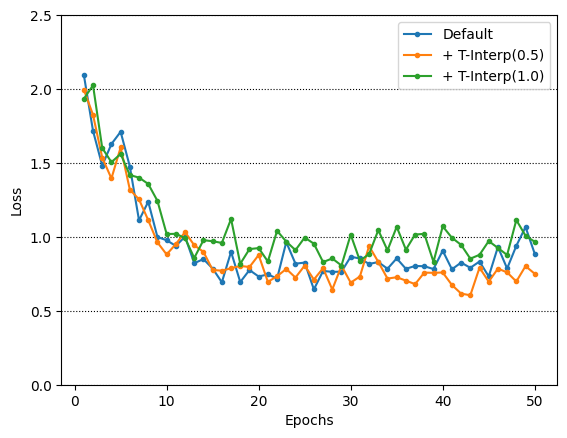

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_tinterp_00_vs_tinterp_00)+1)
plt.plot(xs, val_losses_tinterp_00_vs_tinterp_00, label="Default", marker=".")
plt.plot(xs, val_losses_tinterp_05_vs_tinterp_00, label="+ T-Interp(0.5)", marker=".")
plt.plot(xs, val_losses_tinterp_10_vs_tinterp_00, label="+ T-Interp(1.0)", marker=".")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

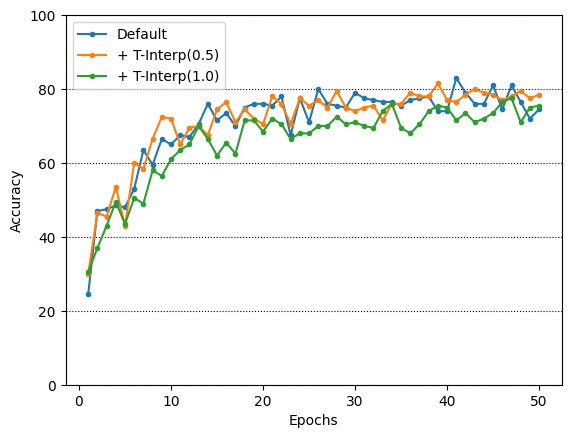

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_tinterp_00_vs_tinterp_00)+1)
plt.plot(xs, test_accs_tinterp_00_vs_tinterp_00, label="Default", marker=".")
plt.plot(xs, test_accs_tinterp_05_vs_tinterp_00, label="+ T-Interp(0.5)", marker=".")
plt.plot(xs, test_accs_tinterp_10_vs_tinterp_00, label="+ T-Interp(1.0)", marker=".")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()

#### Recognition performance (with interpolation at test time)

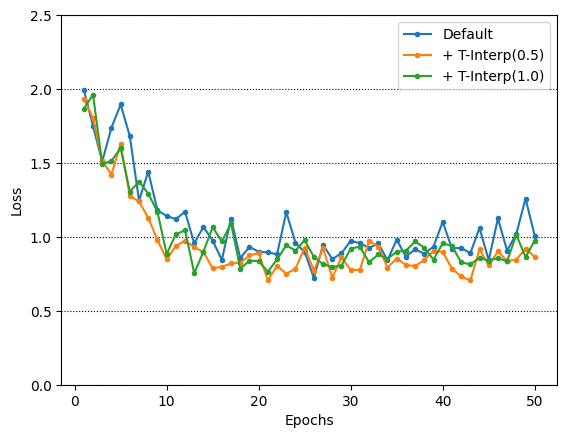

In [ ]:
import matplotlib.pyplot as plt

plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(val_losses_tinterp_00_vs_tinterp_00)+1)
plt.plot(xs, val_losses_tinterp_00_vs_tinterp_10, label="Default", marker=".")
plt.plot(xs, val_losses_tinterp_05_vs_tinterp_10, label="+ T-Interp(0.5)", marker=".")
plt.plot(xs, val_losses_tinterp_10_vs_tinterp_10, label="+ T-Interp(1.0)", marker=".")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.ylim([0.0, 2.5])
plt.legend()
plt.show()

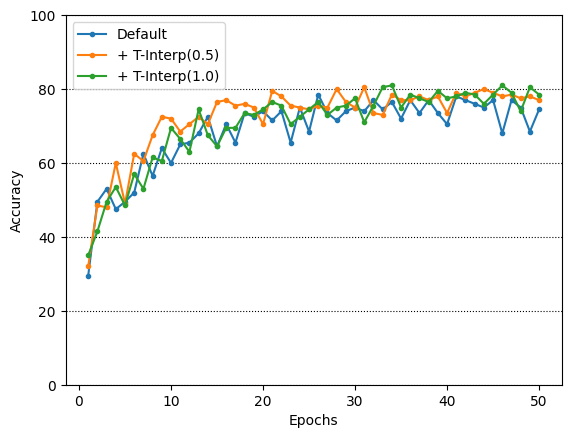

In [ ]:
plt.grid(axis="y", linestyle="dotted", color="k")

xs = np.arange(1, len(test_accs_tinterp_00_vs_tinterp_00)+1)
plt.plot(xs, test_accs_tinterp_00_vs_tinterp_10, label="Default", marker=".")
plt.plot(xs, test_accs_tinterp_05_vs_tinterp_10, label="+ T-Interp(0.5)", marker=".")
plt.plot(xs, test_accs_tinterp_10_vs_tinterp_10, label="+ T-Interp(1.0)", marker=".")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.ylim([0.0, 100.0])
plt.legend()
plt.show()